In [1]:
import pandas as pd

# Загрузка данных из файла Excel
df = pd.read_excel('Trans.xlsx')

In [2]:
# Общая предварительная информация о данных
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13575 entries, 0 to 13574
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Provider ID                13220 non-null  float64       
 1   Operation ID               13575 non-null  int64         
 2   Payment ID                 13575 non-null  object        
 3   Operation Type             13575 non-null  object        
 4   Operation Status           13575 non-null  object        
 5   Secure 3ds Check           1209 non-null   float64       
 6   Channel Amount             13572 non-null  float64       
 7   Channel Currency           13562 non-null  object        
 8   Operation created at Date  13575 non-null  datetime64[ns]
 9   Payment Method Type        13568 non-null  object        
 10  Account Number             13200 non-null  object        
 11  Merchant ID                13575 non-null  int64         
 12  Proj

In [3]:
# Проверим есть ли пропущенные значения
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Provider ID              355
Secure 3ds Check       12366
Channel Amount             3
Channel Currency          13
Payment Method Type        7
Account Number           375
Customer ID               33
Customer Email          1495
Card Holder             1151
Issuer Country Name     1062
Country By IP Name        56
Issuer Bank Name        1176
dtype: int64


In [5]:
SOME_THRESHOLD = 100000  # Пример высокой суммы транзакции

In [6]:
high_value_transactions = df[(df['Operation Status'] == 'success') & (df['Channel Amount'] > SOME_THRESHOLD)]

In [7]:
# Также можно исследовать страны по IP и страны эмитента, чтобы найти несоответствия
mismatched_countries = df[df['Issuer Country Name'] != df['Country By IP Name']]

In [8]:
# Повторная покупка на подозрительно высокую сумму от того же клиента
suspicious_operations = df[df.duplicated(['Customer ID', 'Channel Amount'], keep=False) &
                           (df['Operation Status'] == 'success') &
                           (df['Channel Amount'] > SOME_THRESHOLD)]


In [9]:
# Получаем список уникальных пользователей с подозрительными транзакциями
suspected_customers = suspicious_operations['Customer ID'].unique()
print(suspected_customers)


['4636763' '2835270' '358244' '4503532' '12832182' '350879' '327377']


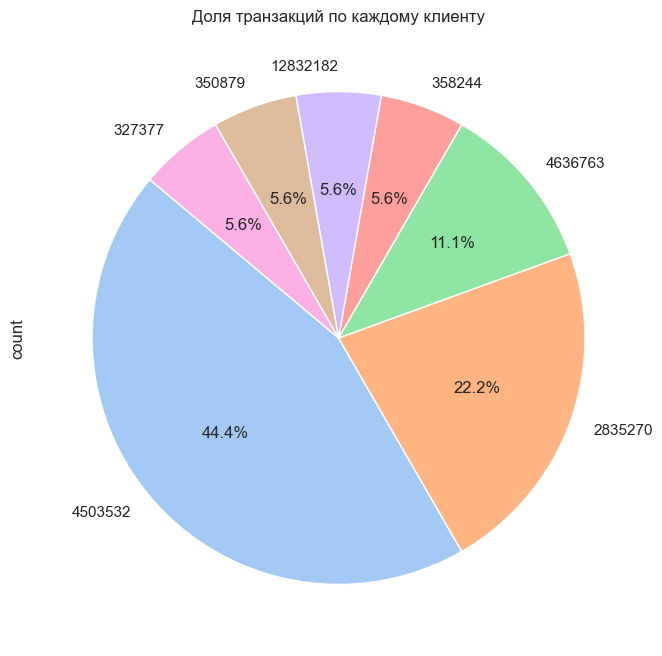

In [29]:
# Создание круговой диаграммы 
plt.figure(figsize=(8, 8))
suspicious_operations['Customer ID'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Настройка заголовка
plt.title('Доля транзакций по каждому клиенту')

# Отображение
plt.show()


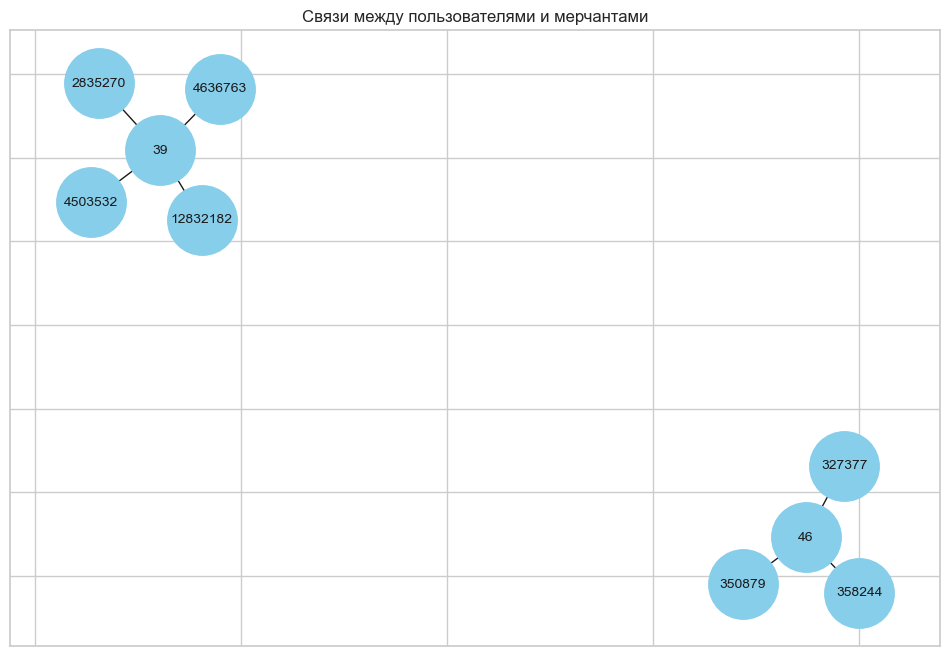

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Создание графа
G = nx.Graph()

# Добавление вершин - пользователей
for customer in suspected_customers:
    G.add_node(customer, type='customer')

# Добавление вершин - мерчантов и рёбер между пользователями и мерчантами
for index, row in suspicious_operations.iterrows():
    customer = row['Customer ID']
    merchant = row['Merchant ID']
    G.add_node(merchant, type='merchant')
    G.add_edge(customer, merchant)

# Отображение графа
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='k', node_size=2500, font_size=10)
plt.title('Связи между пользователями и мерчантами')
plt.show()

Отчет о выявлении фродовых операций

Аналитические инструменты:
- pandas для предварительной обработки и анализа данных
- matplotlib и networkx для визуализации данных
- Python с использованием Jupyter Notebooks для организации аналитического процесса

Фродовые сценарии:
1. Множество успешных транзакций на высокие суммы, превышающие установленный порог.
2. Несоответствие между страной по IP-адресу пользователя и страной эмитента карты.

Обнаруженные пользователи:
Были идентифицированы пользователи, чьи транзакции подозрительно повторялись и превышали пороговые значения.

Визуализация:
Сетевой график показывает связи между пользователями и мерчантами, участвующими в фродовых операциях.

Рекомендации по митигации рисков:
1. Усиление процедур верификации операций, особенно для транзакций высокой стоимости.
2. Мониторинг несоответствий данных, таких как страны эмитенты и IP-адреса.
3. Ограничение количества операций за короткий промежуток времени для одного пользователя.